In [51]:
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SpatialDropout1D
from tensorflow import keras
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from datetime import datetime, timedelta, date
from dateutil.relativedelta import relativedelta
plt.style.use('fivethirtyeight')

In [ ]:
#IHSG
stock_code = 'IHSG'
startdate = '2016-04-12'
enddate = '2021-04-12'
df = web.DataReader(f'^JKSE', data_source='yahoo', start = startdate, end = enddate)

In [52]:
#Ambil Data Saham
stock_code = 'UNVR'
#startdate = str((date.today()-timedelta(days = 365))) 
startdate = str((date.today()-relativedelta(years=5))) #Untuk ambil n tahun kebelakang dapat menggunakan relativedelta
enddate = str(date.today())
df = web.DataReader(f'{stock_code}.JK', data_source='yahoo', start = startdate, end = enddate)

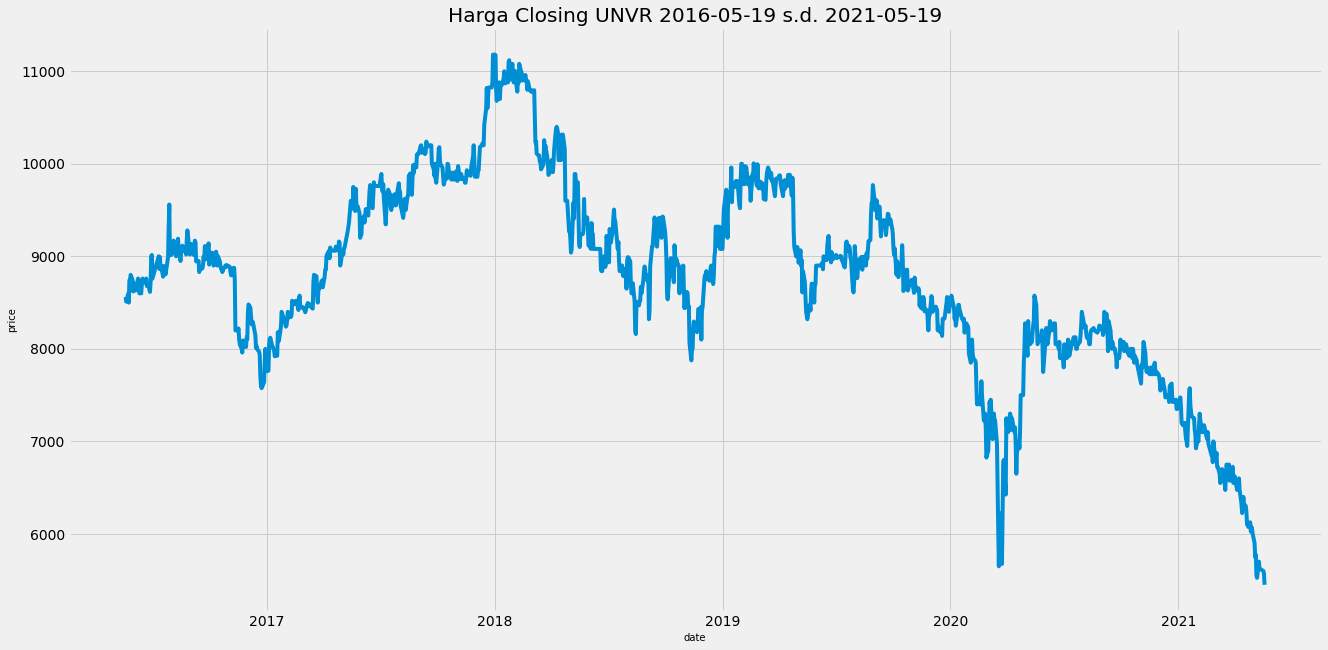

In [53]:
plt.figure(figsize=(20,10))
plt.title(f'Harga Closing {stock_code} {startdate} s.d. {enddate}')
#plt.plot(df['Open'])
plt.plot(df['Close'])
plt.xlabel('date', fontsize = 10)
plt.ylabel('price', fontsize = 10)
plt.show()

In [54]:
#Ambil harga penutupan dari saham
data = df.filter(['Close'])
dataset = data.values
data_len = len(dataset)
print(data_len)

1260


In [55]:
#Apply MinMaxScaler / Normalisasi
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

In [56]:
h = 360 #Jumlah test
inp = 30 #Besar input

In [57]:
data.iloc[0:data_len-h-inp,:]

,Close
Date,
2016-05-19,8560.0
2016-05-20,8510.0
2016-05-23,8595.0
2016-05-24,8500.0
2016-05-25,8740.0
...,...
2019-10-03,9015.0
2019-10-04,9085.0
2019-10-07,8800.0


In [58]:
data.iloc[data_len-(inp+h):data_len,:]

,Close
Date,
2019-10-10,8775.0
2019-10-11,8835.0
2019-10-14,8900.0
2019-10-15,8950.0
2019-10-16,9120.0
...,...
2021-05-10,5700.0
2021-05-11,5625.0
2021-05-17,5600.0


In [59]:
train_data = scaled_data[0:data_len-h-inp,:] 
x_train = []
y_train = []
for i in range(inp, len(train_data)): 
  x_train.append(train_data[i-inp:i, 0])
  y_train.append(train_data[i, 0])
  #if i<=60:
  #  print(x_train)
  #  print(y_train)

In [60]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [61]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 

In [62]:
learning_rate = 0.003
epoch=10

model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#model = load_model('StockPriceLSTMmodel.h5')

In [63]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate=learning_rate), loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=epoch)

Epoch 1/10
840/840 [==============================] - 14s 14ms/step - loss: 0.0215
Epoch 2/10
840/840 [==============================] - 12s 14ms/step - loss: 0.0032
Epoch 3/10
840/840 [==============================] - 12s 14ms/step - loss: 0.0021
Epoch 4/10
840/840 [==============================] - 12s 14ms/step - loss: 0.0029
Epoch 5/10
840/840 [==============================] - 12s 14ms/step - loss: 0.0030
Epoch 6/10
840/840 [==============================] - 12s 14ms/step - loss: 0.0019
Epoch 7/10
840/840 [==============================] - 12s 14ms/step - loss: 0.0016
Epoch 8/10
840/840 [==============================] - 12s 14ms/step - loss: 0.0016
Epoch 9/10
840/840 [==============================] - 12s 14ms/step - loss: 0.0016
Epoch 10/10
840/840 [==============================] - 12s 14ms/step - loss: 0.0016


In [ ]:
#model.save('StockPriceLSTMmodel.h5')

In [64]:
test_data = scaled_data[data_len-(inp+h):data_len,:]
x_test = []
y_test = []
for i in range(inp, len(test_data)):
  x_test.append(test_data[i-inp:i, 0])
  y_test.append(test_data[i, 0])

In [65]:
x_test,y_test = np.array(x_test), np.array(y_test)

In [66]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [67]:
predictions = model.predict(x_test)
print('r2_score: ',r2_score(y_test, predictions))
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions,squared=True))
print('rmse: ',mean_squared_error(y_test, predictions,squared=False))
predictions = scaler.inverse_transform(predictions)
#predictions[:,0]

r2_score:  0.9379214705017962
MAE:  0.024778409283669575
MSE:  0.0010177243507540359
rmse:  0.03190179228121887


In [ ]:
predictions[-1]

array([28784.133], dtype=float32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


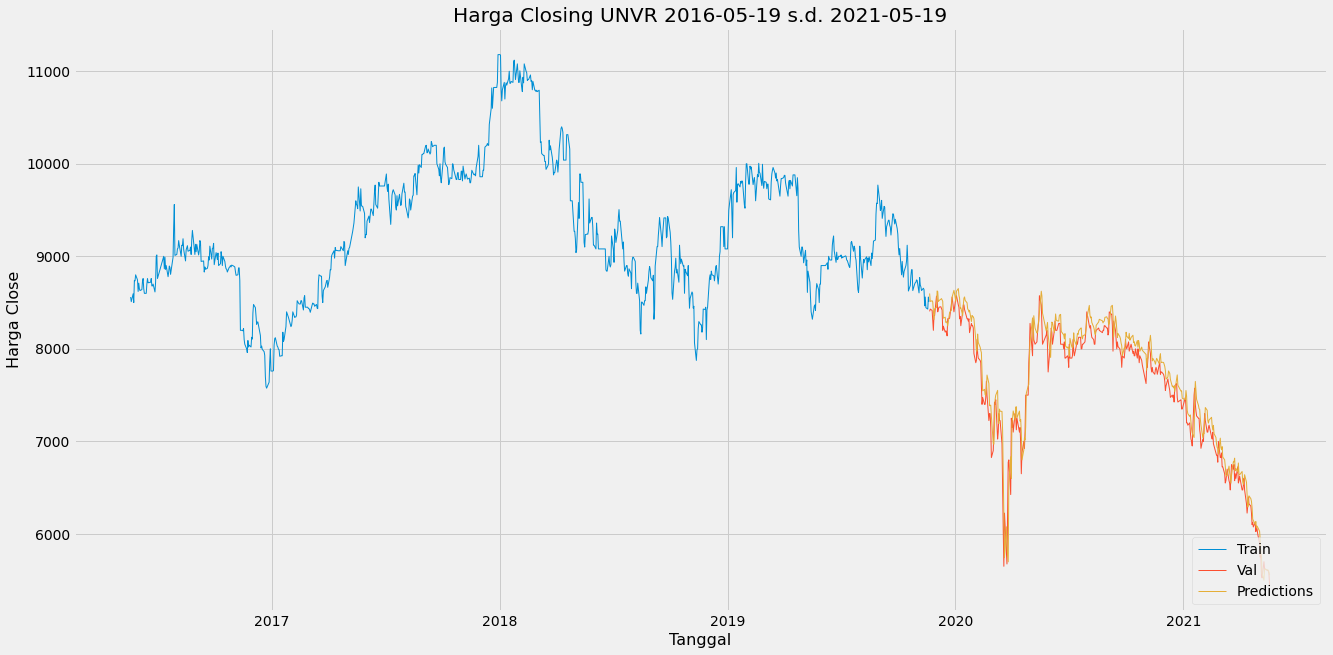

In [68]:
train = data[:data_len-h]
test = data[data_len-h:data_len]
test['Predictions'] = predictions
plt.figure(figsize=(20,10))
plt.title(f'Harga Closing {stock_code} {startdate} s.d. {enddate}')
plt.xlabel('Tanggal', fontsize = 16 )
plt.ylabel('Harga Close', fontsize = 16 )
plt.plot(train['Close'],linewidth=1)
plt.plot(test[['Close','Predictions']],linewidth=1)
#x = pd.to_datetime('2018/02/01', format='%Y/%m/%d')
#str1 = 'Learning rate: {}'.format(learning_rate)
#str2 = 'Epoch: {}'.format(epoch)
#plt.annotate(str1, (x,4200), (x,4200), fontsize=12)
#plt.annotate(str2, (x,4100), (x,4100), fontsize=12)
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

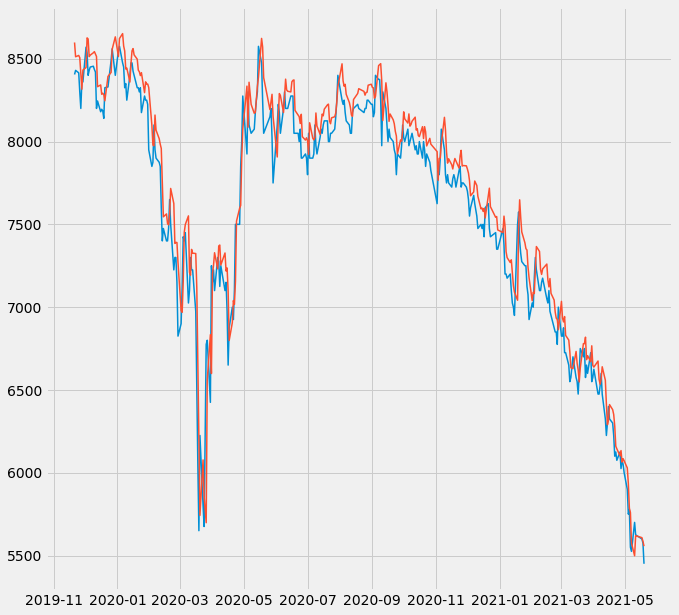

In [69]:
plt.figure(figsize=(10,10))
plt.plot(valid[['Close','Predictions']],linewidth=1.5)

Prediksi Untuk Hari-hari Kedepan

In [70]:
inp

30

In [71]:
hari = int(input("Jumlah hari: "))
data_pred = scaled_data[data_len-inp:data_len,:]
for i in range(0,hari):
  x_pred = np.vstack(data_pred[i:i+inp, 0])
  x_pred = np.array(x_pred)
  x_pred = np.reshape(x_pred, (x_pred.shape[1], x_pred.shape[0], 1))
  predict = model.predict(x_pred)
  data_pred = np.vstack((data_pred, predict))

Jumlah hari: 30


In [40]:
data_pred.shape

(60, 1)

[[5447.60379314]
 [5409.0009895 ]
 [5368.31004322]
 [5325.60062736]
 [5279.38979864]
 [5229.25405413]
 [5174.65889215]
 [5115.05836964]
 [5049.86282706]
 [4978.43444854]
 [4900.08077264]
 [4814.04342175]
 [4719.49041754]
 [4615.50627649]
 [4501.08381301]
 [4375.11969954]
 [4236.41019732]
 [4083.6538887 ]
 [3915.46311855]
 [3730.38346171]
 [3526.93163335]
 [3303.64825606]
 [3059.18221891]
 [2792.39552855]
 [2502.5156337 ]
 [2189.30311859]
 [1853.25594068]
 [1495.81435144]
 [1119.53473747]
 [ 728.19208086]]


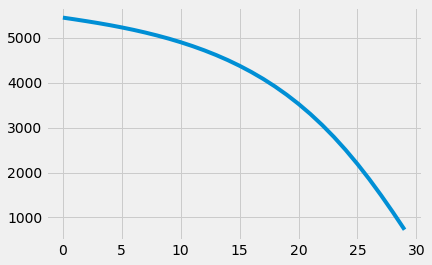

In [72]:
hasil_prediksi = data_pred[len(data_pred)-hari:len(data_pred),:]
hasil_prediksi = scaler.inverse_transform(hasil_prediksi)
print(hasil_prediksi) #Hasil prediksi
plt.plot(hasil_prediksi)

#TRAINING WITH FULL DATASET

In [ ]:
new_train_data = scaled_data[0:training_data_len,:] 
new_x_train = []
new_y_train = []
for i in range(inp, len(new_train_data)): 
  new_x_train.append(new_train_data[i-inp:i, 0])
  new_y_train.append(new_train_data[i, 0])
new_x_train, new_y_train = np.array(new_x_train), np.array(new_y_train) #x_train.shape = (522, 60), y_train.shape = (522,)
new_x_train = np.reshape(new_x_train, (new_x_train.shape[0], new_x_train.shape[1], 1)) #x_train.shape = (522, 60, 1)
new_model = Sequential()
new_model.add(LSTM(60, return_sequences=True, input_shape=(new_x_train.shape[1], 1)))
new_model.add(LSTM(100, return_sequences=False))
new_model.add(Dropout(0.4))
new_model.add(Dense(25))
new_model.add(Dense(1))
new_model.compile(optimizer = keras.optimizers.Adam(learning_rate=learning_rate), loss = 'mean_squared_error')
new_model.fit(x_train, y_train, batch_size=1, epochs=epoch)

Epoch 1/6
541/541 [==============================] - 12s 22ms/step - loss: 0.0144
Epoch 2/6
541/541 [==============================] - 12s 23ms/step - loss: 0.0077
Epoch 3/6
541/541 [==============================] - 12s 22ms/step - loss: 0.0064
Epoch 4/6
541/541 [==============================] - 12s 22ms/step - loss: 0.0050
Epoch 5/6
541/541 [==============================] - 12s 23ms/step - loss: 0.0052
Epoch 6/6
541/541 [==============================] - 13s 23ms/step - loss: 0.0044


In [ ]:
hari = int(input("Jumlah hari: "))
data_pred = scaled_data[training_data_len-inp:training_data_len,:] #60 nilai terakhir dari dataset
for i in range(0,hari):
  x_pred = np.vstack(data_pred[i:i+inp, 0])
  x_pred = np.array(x_pred)
  x_pred = np.reshape(x_pred, (x_pred.shape[1], x_pred.shape[0], 1))
  predict = new_model.predict(x_pred)
  data_pred = np.vstack((data_pred, predict))

Jumlah hari: 14


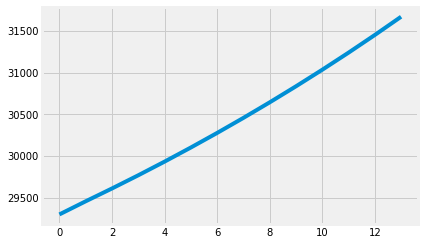

In [ ]:
hasil_prediksi = data_pred[len(data_pred)-hari:len(data_pred),:]
hasil_prediksi = scaler.inverse_transform(hasil_prediksi)
#print(hasil_prediksi) #Hasil prediksi
plt.plot(hasil_prediksi)